In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.gridspec as gridspec
import seaborn as sns

#import glmnet as gln
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as skl_lm
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier, BaggingRegressor
from IPython.display import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.datasets import make_blobs



In [13]:
USArrests =  pd.read_csv('/Users/alexrodriguez/Desktop/Big Data Analytics/Data/USArrests.csv', index_col = 0, na_values = "?").dropna()
USArrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [14]:
Scaled_Data  = StandardScaler().fit_transform(USArrests) 

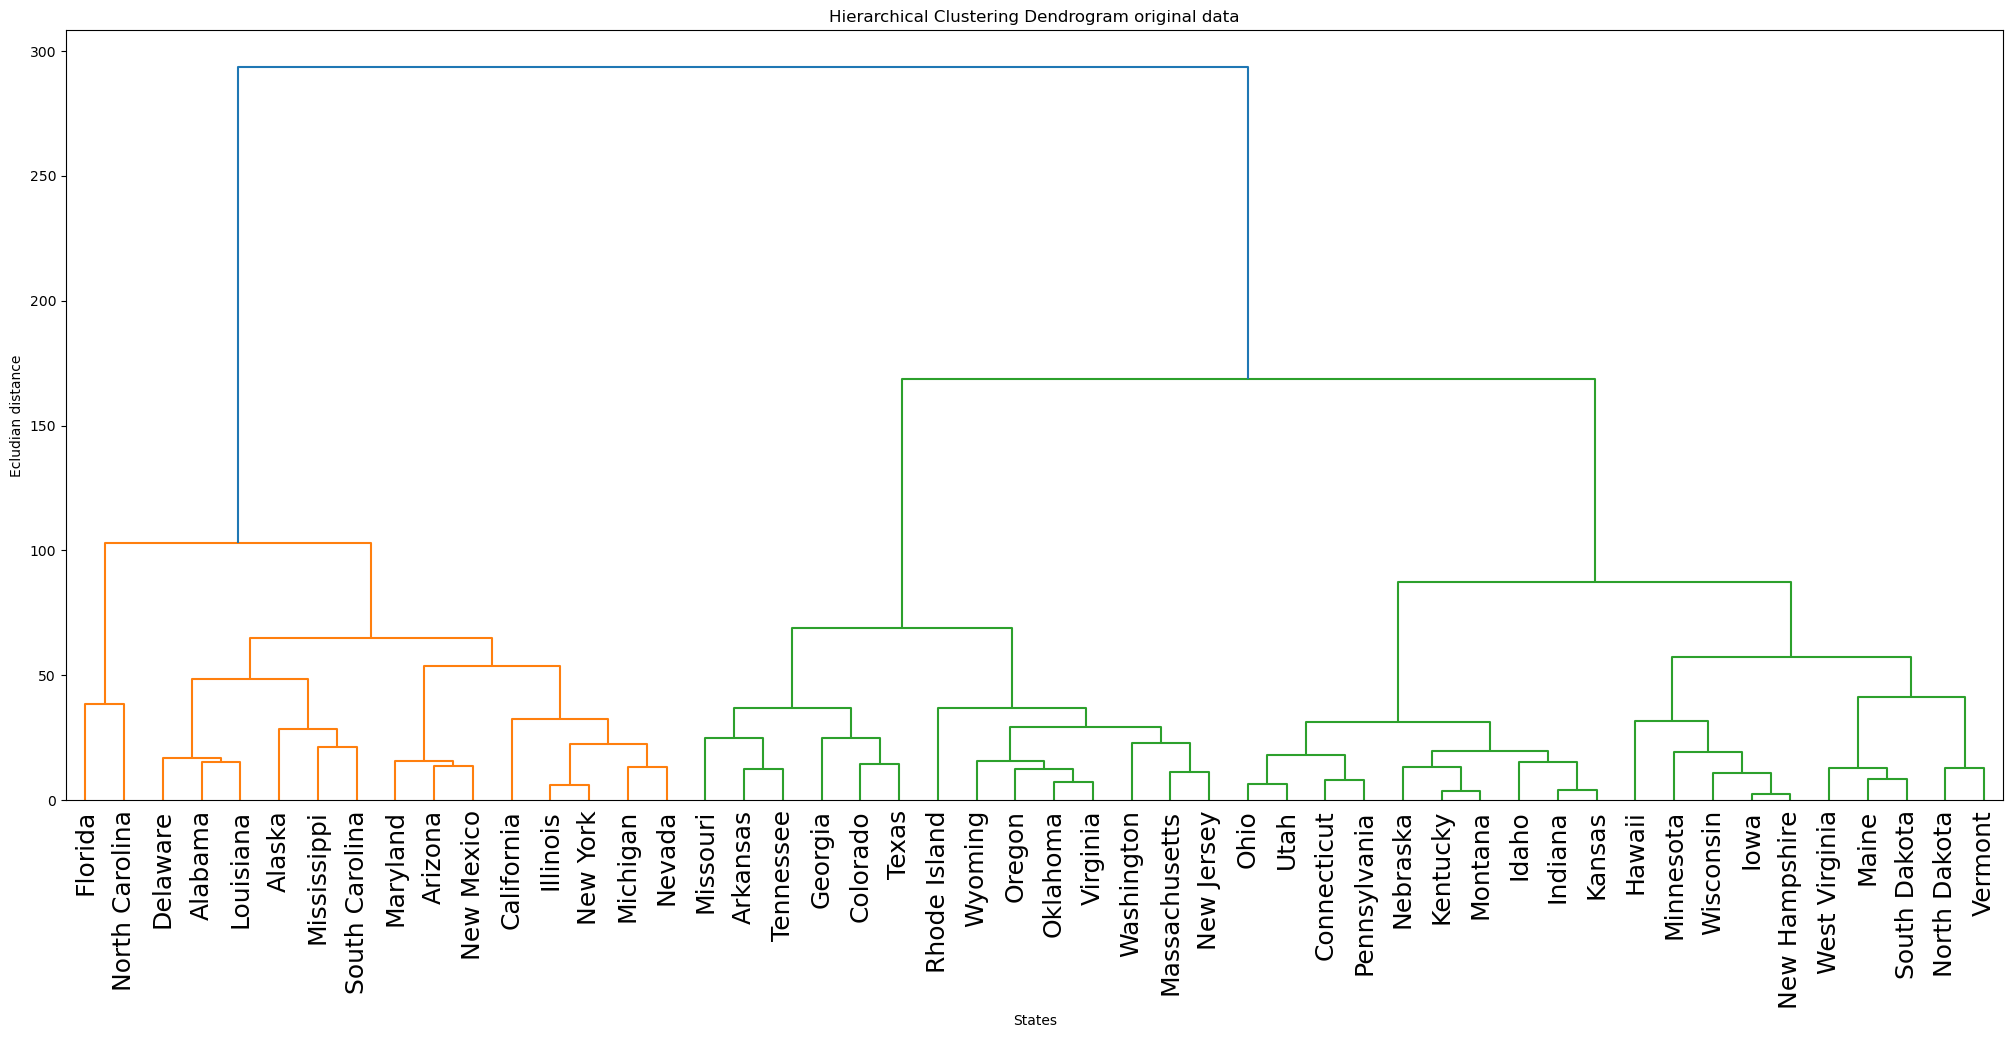

In [15]:
hc_PartA = linkage(USArrests, 'complete', metric = 'euclidean')

plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram original data')
plt.xlabel('States')
plt.ylabel('Ecludian distance')
dendrogram(hc_PartA, leaf_rotation=90, leaf_font_size=18, labels = USArrests.index)
plt.show()

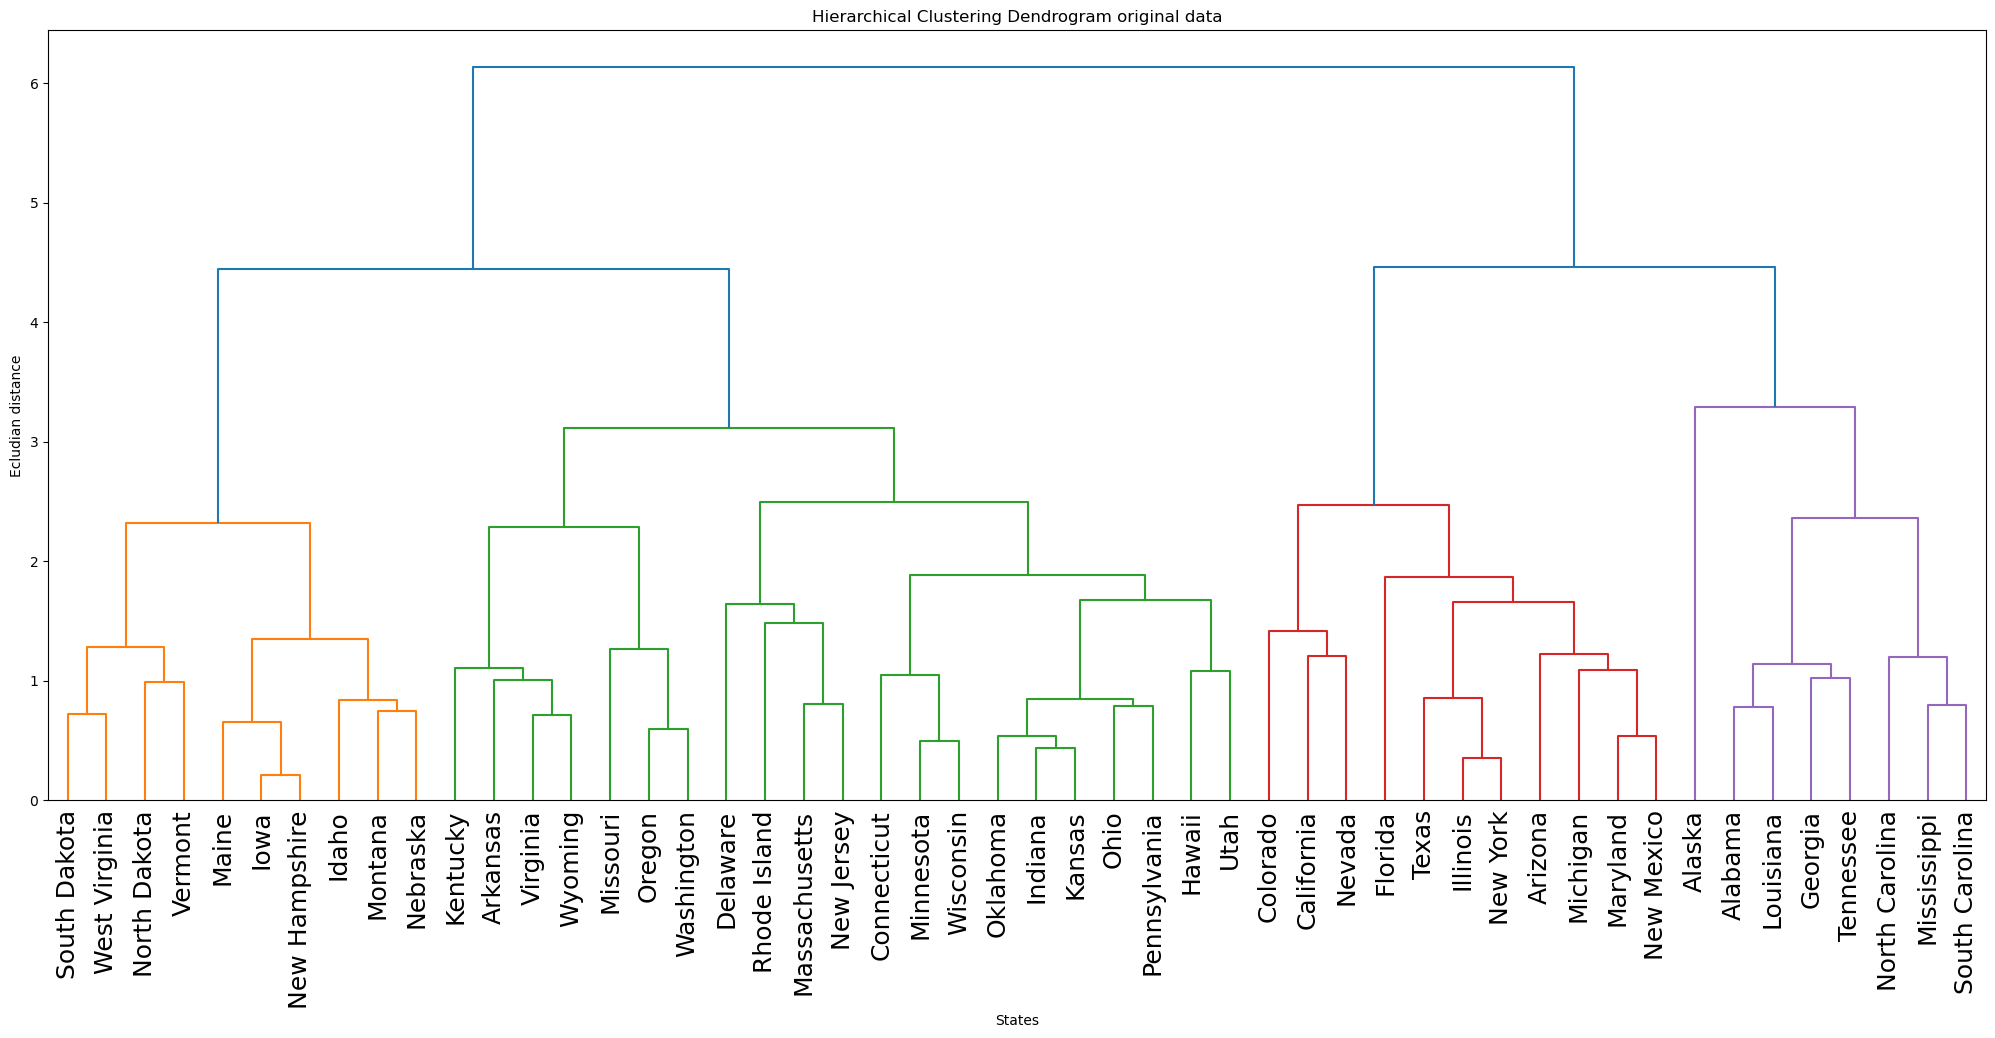

In [20]:
hc_PartC = linkage(Scaled_Data, 'complete', metric = 'euclidean')

Cut_treeC = pd.DataFrame(cut_tree(hc_PartC, n_clusters = 3), index=USArrests.index)
Cut_treeC.index.name = 'states'
Cut_treeC.rename(columns={0: 'ID'}, inplace=True)

plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram scaled data')
plt.xlabel('states')
plt.ylabel('Ecludian distance')
dendrogram(hc_PartC, labels=USArrests.index, leaf_rotation=90, leaf_font_size=18)
plt.axhline(y=4.45, c='k', ls='dashed')
plt.show()

Text(0.5, 1.0, 'scaled data')

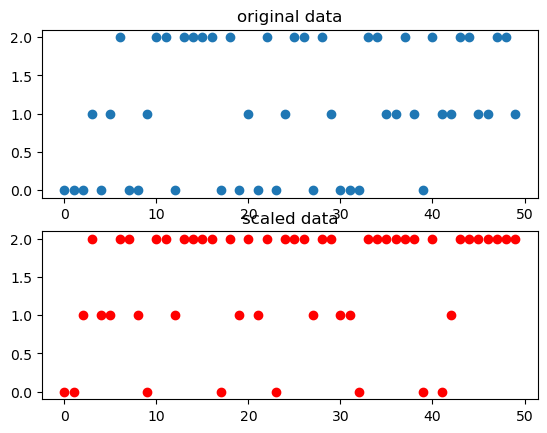

In [18]:
fig1, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(range(0,50), Cut_treeB)
ax1.set_title('original data')
ax2.scatter(range(0,50), Cut_treeC, color='red')
ax2.set_title('scaled data')

In [22]:
X, Y = make_blobs(n_samples=60, n_features=50, centers=3, cluster_std=5, random_state=1)

Text(0, 0.5, 'Second principal component')

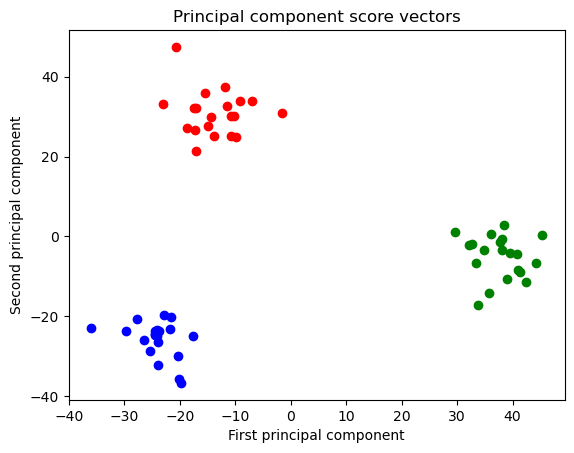

In [23]:
# PCA 
# We are looking for the first two principal components, so n_components=2.
pca = PCA(n_components=2, random_state=1)
X_r = pca.fit_transform(X)
# Plot
plt.figure()
colors = ['blue', 'red', 'green']

for color, i in zip(colors, [0,1,2]):
    plt.scatter(X_r[Y==i, 0], X_r[Y==i, 1], color=color)
plt.title('Principal component score vectors')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [32]:
Kmeans_3 = KMeans(n_clusters=3, random_state = 1)
Kmeans_3.fit(X_r)
Kmeans_3.labels_

array([1, 2, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 2,
       0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2,
       2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 0, 1], dtype=int32)

In [33]:
Y

array([0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1,
       2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0])

In [34]:
pd.crosstab(index = Kmeans_3.labels_, columns = Y, rownames=['K-Means 3'], colnames=['Y'])

Y,0,1,2
K-Means 3,,,
0,0,0,20
1,20,0,0
2,0,20,0


In [29]:
X_scaled = StandardScaler().fit_transform(X)
Km3 = KMeans(n_clusters=3, random_state = 1)
Km3.fit(X_scaled)
Km3.labels_


array([0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1,
       2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0])

In [30]:
Y

array([0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1,
       2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0])

In [31]:
pd.crosstab(index = Km3.labels_, columns = Y, rownames=['K-Means 3'], colnames=['Y'])

Y,0,1,2
K-Means 3,,,
0,0,0,20
1,20,0,0
2,0,20,0
